In [35]:
# Loading required packages
library(plyr)
library(dplyr)
library(reshape)
library(ggplot2)
library(phyloseq)
library(breakaway)
library(wesanderson)

In [36]:
ps = readRDS(file="CHTC/Dada2_Results_OA20_PEAR/ps.fungi")

In [65]:
ps = subset_samples(ps,Sample_ID!="15S-NT-44M")
ps = subset_samples(ps,Sample_ID!="15S-NT-30O")
ps = subset_samples(ps,Org_or_Min!="B")
#ps = subset_taxa(ps,Trophic.Mode %in% c('Symbiotroph','Saprotroph-Symbiotroph','Pathogen-Saprotroph-Symbiotroph','Pathotroph-Saprotroph-Symbiotroph','Pathotroph-Symbiotroph'))

In [66]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5670 taxa and 99 samples ]
sample_data() Sample Data:       [ 99 samples by 105 sample variables ]
tax_table()   Taxonomy Table:    [ 5670 taxa by 18 taxonomic ranks ]

In [67]:
FreqTableGenerator = function(Sample){
    df = data.frame(t(otu_table(ps))[,Sample])
    # Grab the OTU table
    colnames(df)="Frequency"
    # Add a column for the frequencies of the OTUs
    df = df %>%
        group_by(Frequency)%>%
        summarize(nOTUs=n())%>%
        arrange(Frequency)
    # Summarize the total OTUs that are present at each frequency
    df = df[df$Frequency>1,]
    # Cut out the 0 and 1 frequencies (because dada2 trimmed singletons)
    colnames(df)=NULL
    # Omit column names
    df = as.matrix(df)
    # Spit out a nice matrix
    df
}
# Generates the frequency table summary needed by breakaway

In [68]:
Samples = sample_names(ps)

In [69]:
colnames(mdf)

[1] "Barcodes"                  "Sample_ID"                
  [3] "Site_ID"                   "Org_or_Min"               
  [5] "Exch_Na_mg_kg"             "Exch_Mg_mg_kg"            
  [7] "Exch_K_mg_kg"              "Exch_Ca_mg_kg"            
  [9] "pH"                        "EC_mS_cm"                 
 [11] "CEC_cmol_kg"               "Total_N_pct"              
 [13] "Total_S_pct"               "Sand_pct"                 
 [15] "Clay_pct"                  "Silt_pct"                 
 [17] "Ca_mg_kg"                  "K_mg_kg"                  
 [19] "Mg_mg_kg"                  "Na_mg_kg"                 
 [21] "P_mg_kg"                   "S_mg_kg"                  
 [23] "Al_mg_kg"                  "Fe_mg_kg"                 
 [25] "Zn_mg_kg"                  "Cu_mg_kg"                 
 [27] "Mn_mg_kg"                  "Mo_mg_kg"                 
 [29] "TIC_ash_pct"               "TOC_LOI_pct"              
 [31] "TOC_HCL_cruc_pct"          "TC_pct"                   
 [33] "Fire_ID"                   "Ecosite"                  
 [35] "Moisture"                  "Moisture_Regime"          
 [37] "Nutrient"                  "Community"                
 [39] "Forest"                    "Plains"                   
 [41] "Interval"                  "Veg_Comm"                 
 [43] "Land_Class_Unburned"       "Land_Class"               
 [45] "Burned_Unburned"           "Understory_CBI"           
 [47] "Overstory_CBI"             "CBI"                      
 [49] "RBR"                       "Pct_Exposed_Mineral"      
 [51] "CFSI"                      "Burn_Severity_Index"      
 [53] "Mean_Duff_Depth_cm"        "O_Depth_cm"               
 [55] "Dead_Trees"                "Live_Trees"               
 [57] "nTrees"                    "Severity_Class"           
 [59] "temp"                      "rh"                       
 [61] "ws"                        "prec"                     
 [63] "ffmc"                      "dmc"                      
 [65] "dc"                        "isi"                      
 [67] "bui"                       "fwi"                      
 [69] "Correct_ID"                "Number_Fires_Recorded"    
 [71] "TSLF"                      "TSO"                      
 [73] "Fires_PerYear"             "Fires_PerDecade_Recording"
 [75] "Longest_Period_Btw_Fires"  "Shortest_Period_Btw_Fires"
 [77] "Mean_Period_Btw_Fires"     "Reburn_Severity_Index"    
 [79] "Overstory_Dens_ha"         "Understory_Dens_ha"       
 [81] "Abs_Density_Ha_UnderOver"  "PINUBAN_Stems_Ha"         
 [83] "PICEMAR_Stems_Ha"          "PICEGLA_Stems_Ha"         
 [85] "LARILAR_Stems_Ha"          "POPUTRE_Stems_Ha"         
 [87] "POPUBAL_Stems_Ha"          "BETUPAP_Stems_Ha"         
 [89] "PINUBAN_BA_per_Ha"         "PICEMAR_BA_per_Ha"        
 [91] "PICEGLA_BA_per_Ha"         "LARILAR_BA_per_Ha"        
 [93] "POPUTRE_BA_per_Ha"         "POPUBAL_BA_per_Ha"        
 [95] "BETUPAP_BA_per_Ha"         "BA_ha"                    
 [97] "Pct_Conifer_Stems_lar"     "Pct_Conifer_BA_lar"       
 [99] "Median_CBH"                "Flammable_T_ha"           
[101] "Conifer_CBD"               "Surface_Severity_Class"   
[103] "Richness_estimate"         "Richness_stderr"          
[105] "Richness_model"

In [70]:
mdf[,c("Richness_stderr","Richness_estimate","Veg_Comm")]

,Richness_stderr,Richness_estimate,Veg_Comm
15S-NT-19O,32.45927,505.0552,Treed Wetland
15S-NT-20O,421.60131,308.1645,Open Wetland
15S-NT-21M,50.47771,287.7670,Open Wetland
15S-NT-21O,2273.21767,456.4735,Open Wetland
15S-NT-22M,22.04937,348.7321,Jack Pine
15S-NT-22O,21.71528,153.1270,Jack Pine
15S-NT-23M,1867.56891,504.4407,Jack Pine
15S-NT-23O,32.72536,296.2187,Jack Pine
15S-NT-24M,289.18179,574.6566,Mixedwood
15S-NT-24O,46.67626,372.3654,Mixedwood


In [71]:
report = data.frame(name="",Richness_estimate="",Richness_stderr="",Richness_model="")
breakawayrunner = function(SampleName){
    df = FreqTableGenerator(SampleName)
    #print(head(df))
    #print(SampleName)
    #print(sum(df[,1]*df[,2]))
    if(df[1,1]==2 & (sum(df[1:6,1])==sum(c(2:7)))){
        # First, check that the first frequency count is, indeed, 2,
        # and there are at least 6 consecutive counts (could actually just do this test)
            m = breakaway_nof1(df, answers=TRUE, plot=FALSE, print=FALSE)
        # Run breakaway for the no singletons data
            Richness_model = m$name
            Richness_estimate = m$est
            Richness_stderr = m$seest
            name = SampleName
        # Grab the outputs
            report = data.frame(name,Richness_estimate,Richness_stderr,Richness_model)
        # Generate a report
    } else {
        name = SampleName
        report=data.frame(name)
        # If breakaway isn't going to work anyway, just spit out the name (and NAs)
        }

    report

}

In [72]:
Reports = mdply(Samples,breakawayrunner)
head(Reports)

X1,name,Richness_estimate,Richness_stderr,Richness_model
1,15S-NT-19O,505.0552,32.45927,WLRM
2,15S-NT-20O,308.1646,421.60244,model_1_1
3,15S-NT-21M,287.7701,50.48457,model_1_1
4,15S-NT-21O,456.4735,2273.21767,model_2_1
5,15S-NT-22M,348.7321,22.04937,WLRM
6,15S-NT-22O,153.1270,21.71528,WLRM


In [73]:
Report_Summary = Reports %>%
    group_by(Richness_model)%>%
    summarize(n())
Report_Summary

Richness_model,n()
WLRM,26
model_1_1,55
model_2_1,14
model_3_2,2
model_1_0,1
model_2_2,1


In [74]:
sample_data(ps)[,colnames(Reports)[3:5]]=Reports[,3:5]

In [75]:
mdf = sample_data(ps)
mdf$CBI = as.numeric(mdf$CBI)
mdf$Burn_Severity_Index = as.numeric(mdf$Burn_Severity_Index)

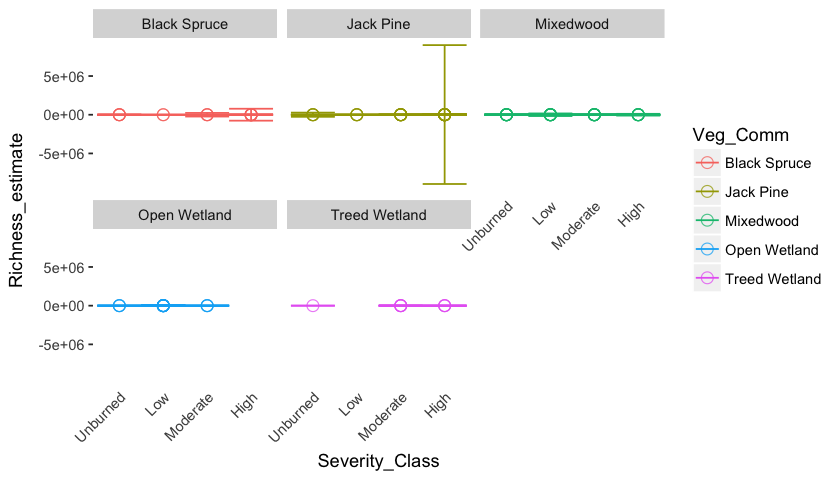

In [76]:
options(repr.plot.width=7, repr.plot.height=4)

p = ggplot(mdf, aes(Severity_Class, Richness_estimate, colour=Veg_Comm))
#p = p + geom_boxplot()
p = p + geom_point(size=3,pch=21, alpha=0.75)
p = p + geom_errorbar(aes(ymin = Richness_estimate-1.96*Richness_stderr, ymax = Richness_estimate+1.96*Richness_stderr), width = 1)
#p = p + ylim(0,1000)
p = p + facet_wrap(~Veg_Comm)
p = p + theme(axis.text.x=element_text(angle=45, hjust=1)
              ,axis.ticks.x=element_blank()
             #,panel.grid=element_blank()
             ,panel.background=element_blank()
             )
p

Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 56 rows containing missing values (geom_errorbar).”

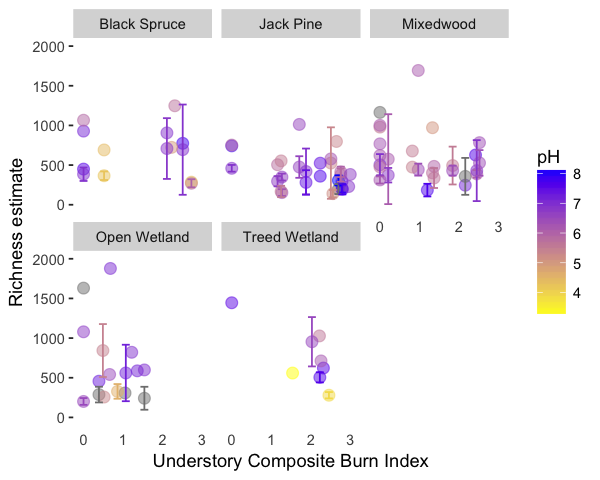

In [77]:
options(repr.plot.width=5, repr.plot.height=4)

p = ggplot(mdf, aes(CBI, Richness_estimate, colour=pH))
#p = p + geom_boxplot()
p = p + geom_point(size=3, alpha=0.5)
p = p + geom_errorbar(aes(ymin = Richness_estimate-1.96*Richness_stderr, ymax = Richness_estimate+1.96*Richness_stderr), width = 0.2)
p = p + ylim(0,2000)
p = p + scale_colour_gradient(low="yellow",high="blue")
p = p + facet_wrap(~Veg_Comm)
p = p + theme(#axis.text.x=element_text(angle=45, hjust=1)
              ,axis.ticks.x=element_blank()
             #,panel.grid=element_blank()
             ,panel.background=element_blank()
             )
#p = p + guides(colour=guide_legend(title=""))
p = p + ylab("Richness estimate")
p = p + xlab("Understory Composite Burn Index")
p

In [78]:
BettaRunner = function(Veg_Comm){
    df=mdf
    d = df[df$Veg_Comm==Veg_Comm,]
    CoVars = data.frame(Veg_Comm=d$Veg_Comm,Severity_Class=d$Severity_Class)
    CoVars$Severity=c(rep("",dim(CoVars)[1]))
    SeverityOptions = levels(CoVars$Severity_Class)
    N = length(SeverityOptions)
    for (i in 1:dim(CoVars)[1]){
        Severity_Class = paste(CoVars$Severity_Class[i])    
        if("Unburned" %in% SeverityOptions){CoVars$Unburned[i] = ifelse(Severity_Class=="Unburned",1,0)}
        if("Low" %in% SeverityOptions){CoVars$Low[i] = ifelse(Severity_Class=="Low",1,0)}
        if("Moderate" %in% SeverityOptions){CoVars$Moderate[i] = ifelse(Severity_Class=="Moderate",1,0)}
        if("High" %in% SeverityOptions){CoVars$High[i] = ifelse(Severity_Class=="High",1,0)}
    }
    nmax = 3+N
    CoVars = as.matrix(CoVars[,4:nmax])
    Richness_estimates = as.vector(d$Richness_estimate)
    Richness_stderr = as.vector(d$Richness_stderr)
    BettaEst = betta(Richness_estimates,Richness_stderr,CoVars)
    X = data.frame(BettaEst$table)
    X$Veg_Comm = Veg_Comm
    return(X)
}

In [79]:
Veg_Comms = levels(mdf$Veg_Comm)

In [80]:
x = lapply(Veg_Comms,FUN=BettaRunner)

In [81]:
x[[1]]$Severity_Class=row.names(x[[1]])
x[[2]]$Severity_Class=row.names(x[[2]])
x[[3]]$Severity_Class=row.names(x[[3]])
x[[4]]$Severity_Class=row.names(x[[4]])
x[[5]]$Severity_Class=row.names(x[[5]])

In [82]:
x = rbind(x[[1]],x[[2]],x[[3]],x[[4]],x[[5]])
x = data.frame(x)
x$p.adj = p.adjust(x$p.values, method = "bonferroni")
x$Ymin = x$Estimates-1.96*x$Standard.Errors
x$Ymax = x$Estimates+1.96*x$Standard.Errors
x$comb = paste(x$Veg_Comm,x$Severity_Class)
x

,Estimates,Standard.Errors,p.values,Veg_Comm,Severity_Class,p.adj,Ymin,Ymax,comb
Unburned,390.8835,143.84898,0.007,Black Spruce,Unburned,0.126,108.93945,672.8275,Black Spruce Unburned
Low,366.1000,142.75626,0.010,Black Spruce,Low,0.180,86.29770,645.9022,Black Spruce Low
Moderate,719.7091,233.54279,0.002,Black Spruce,Moderate,0.036,261.96526,1177.4530,Black Spruce Moderate
High,358.3560,124.84941,0.004,Black Spruce,High,0.072,113.65115,603.0608,Black Spruce High
Unburned1,459.7649,103.87068,0.000,Jack Pine,Unburned,0.000,256.17835,663.3514,Jack Pine Unburned
Low1,239.4133,75.13256,0.001,Jack Pine,Low,0.018,92.15349,386.6731,Jack Pine Low
Moderate1,325.2860,52.48512,0.000,Jack Pine,Moderate,0.000,222.41515,428.1568,Jack Pine Moderate
High1,266.9156,38.84617,0.000,Jack Pine,High,0.000,190.77709,343.0541,Jack Pine High
Unburned2,408.9514,70.84646,0.000,Mixedwood,Unburned,0.000,270.09231,547.8104,Mixedwood Unburned
Low2,350.5299,56.56136,0.000,Mixedwood,Low,0.000,239.66967,461.3902,Mixedwood Low


In [83]:
x$Severity_Class=factor(x$Severity_Class,levels=c("Unburned","Low","Moderate","High"))
x$Veg_Comm = factor(x$Veg_Comm, levels=c("Black Spruce", "Jack Pine", "Mixedwood", "Treed Wetland", "Open Wetland"))

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

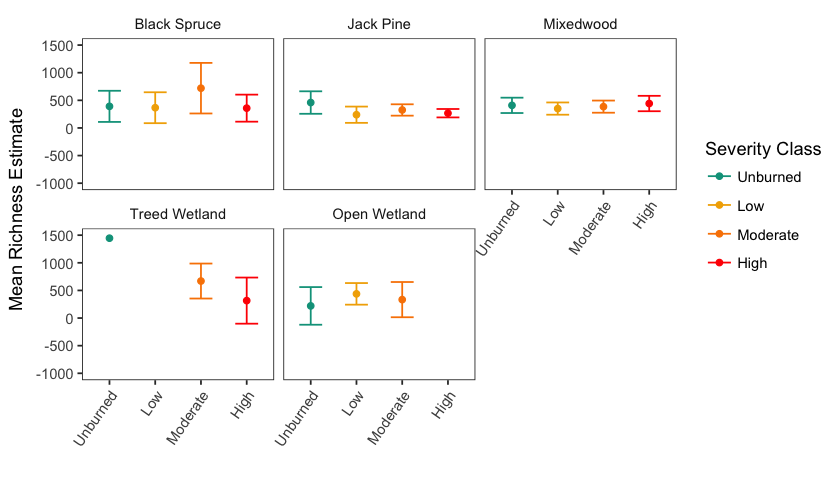

In [95]:
options(repr.plot.width=7, repr.plot.height=4)
p = ggplot(x)
p = p + geom_errorbar(aes(x=Severity_Class,min = Ymin, max = Ymax,color=Severity_Class),width=0.5)
p = p + geom_point(aes(x=Severity_Class,y=Estimates,color=Severity_Class))
#p = p + geom_point(aes(x=Severity_Class,y=Estimates-1.96*Standard.Errors,color=Severity_Class))
#p = p + geom_point(aes(x=Severity_Class,y=Estimates+1.96*Standard.Errors,color=Severity_Class))
p = p + facet_wrap(~Veg_Comm)
#p = p + ylim(-500,1500)
#p = p + ylim(-2500,2500)
palette = wes_palette("Darjeeling")[c(2,3,4,1,5)]
p = p + scale_colour_manual(values=palette)
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    #,strip.text.x = element_text(size=14, face="bold")
        #,axis.title = element_text(size=22, face="bold")
        #,axis.text = element_text(size=16)
        #,legend.text = element_text(size=16)
        #,legend.title = element_text(size = 22)
        ,strip.background = element_rect(colour="white", fill="white"))
p = p + theme(axis.text.x = element_text(angle=55,hjust=1))
p = p + ylab("Mean Richness Estimate")
p = p + xlab("")
p = p + guides(colour=guide_legend(title="Severity Class"))
p = p + ylim(-1000,1500)
p